Integral probability: 0.1353352832366127


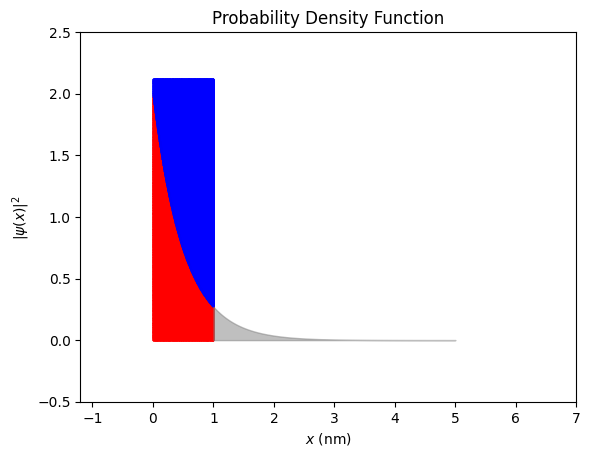

Analytic probability for x >= 1 nm: 0.1353352832366127
Monte Carlo estimated probability for x >= 1 nm: 0.13555347471807133
Relative error: 0.0016122290968065996


In [33]:
# particle_location.ipynb

# Cell 1: Estimate PDF with Monte Carlo

import numpy as np
import matplotlib.pyplot as plt
from numba import float64, vectorize


# Helper function to calculate the normalization constant, given the formula c = sqrt(2/L)
def normalization_constant(L):
    return np.sqrt(2 / L)


# Helper function to generate Halton sequence
@vectorize([float64(float64, float64)], nopython=True)
def halton_sequence(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


# Helper function for the wave function PDF, given the equation c^2 * exp(-2x/L)
def wave_function_pdf(x):
    return 2 * np.exp(-2 * x)


# Helper function to compute the probability
def integral(x):
    return 1 - np.exp(-2 * x)


def main():
    L = 1.0
    c = normalization_constant(L)

    # Calculate analytic solution for when x >= 1 nm
    actual_probability = np.exp(-2)

    # Monte Carlo simulation
    n = 250000

    # Estimate the probability for x >= 1 nm
    x_random = 1 - halton_sequence(np.arange(n), 2)
    y_random = (1 - halton_sequence(np.arange(n), 3)) * c * 1.5

    # Plot the PDF
    x = np.linspace(0, 5, 1000)
    y = wave_function_pdf(x)

    # Determine which points are within the region
    d = y_random - wave_function_pdf(x_random)
    samples_in_x = x_random[d <= 0.0]
    samples_in_y = y_random[d <= 0.0]
    samples_out_x = x_random[d > 0.0]
    samples_out_y = y_random[d > 0.0]

    mc_probability = 1 - (np.count_nonzero(d <= 0.0) / n * c * 1.5)
    # Calculate relative error
    relative_error = np.abs(mc_probability - actual_probability) / actual_probability

    # Plot
    plt.figure(" ")
    plt.scatter(samples_in_x, samples_in_y, color="red", marker=".", s=0.1)
    plt.scatter(samples_out_x, samples_out_y, color="blue", marker=".", s=0.1)
    plt.xlim(-1.2, 7)
    plt.ylim(-0.5, 2.5)

    actual = 1 - integral(1)
    print(f"Integral probability: {actual}")

    # Set titles, axis labels, and fill in region
    plt.fill_between(x, y, where=(x >= 1), color="gray", alpha=0.5)
    plt.xlabel("$x$ (nm)")
    plt.ylabel(r"$|\psi(x)|^2$")
    plt.title("Probability Density Function")
    plt.show()

    # Print results
    print(f"Analytic probability for x >= 1 nm: {actual_probability}")
    print(f"Monte Carlo estimated probability for x >= 1 nm: {mc_probability}")
    print(f"Relative error: {relative_error}")


main()